<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Going_Deeper_with_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Going Deeper with Convolutions**

논문 링크: https://arxiv.org/abs/1409.4842

GoogLeNet은 **Inception**이라는 개념을 제안하여 만든 모델로써, **2014년에 개최된 ILSVRC(ImageNet Large Scale Visual Recognition Challenge)에서 우승**을 차지한 신경망(CNN) 구조이다.

CNN의 성능을 향상시키는 가장 직접적인 방법은 망의 크기를 늘리는 것이다. 단순 detpth를 늘리는 것이 아니라 각 Layer의 width도 늘리는 것을 의미한다.

하지만 이런 경우 2가지의 문제점이 있다.
1. 망이 깊어질수록 자유 파라미터의 수가 증가하게 되며, **Overfitting**에 빠질 가능성이 높아진다.
2. 망의 크기가 커질 수록, **연산량**이 늘어나게 된다.

그래서 GoogLeNet에서는 망의 깊이 및 넓이가 모두 커지고, 중간에 분기되는 부분도 있는 **Inception**이라는 모듈이 등장하게 된다.

먼저, Inception의 뼈대가 되는 구조인 **Network In Network**를 먼저 살펴보겠다.

## **NIN(Network In Network)**

NIN은 이름 그대로 네트워크 속 네트워크를 의미한다. 일반적인 CNN 모델의 구조는 feature extraction(conv + pooling)과 classifier(fully connected layer)로 구성이 된다.

NIN 설계자는 **CNN의 convolution layer가 local receptive field에서 feature를 추출해내는 능력은 우수하지만, filter의 특징이 linear하기 때문에, non-linear한 성질을 갖는 feature를 추출하기엔 어려워, 이를 극복하기 위해 feature의 개수를 늘려야 하는** 문제에 주목을 했다.

그래서 NIN 설계자는 local receptive field안에서 feature을 더 잘 추출할 수 있는 방법을 연구했으며, 이를 통해 **micro nerual network**를 설계하였다.
이들은 **convolution을 수행하기 위한 filter 대신에 MLP(Multi-Layer Perceptron)을 사용하여 feature를 추출**할 수 있도록 하였다.

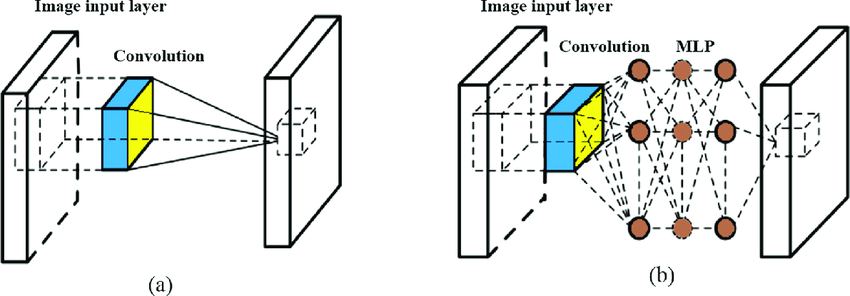

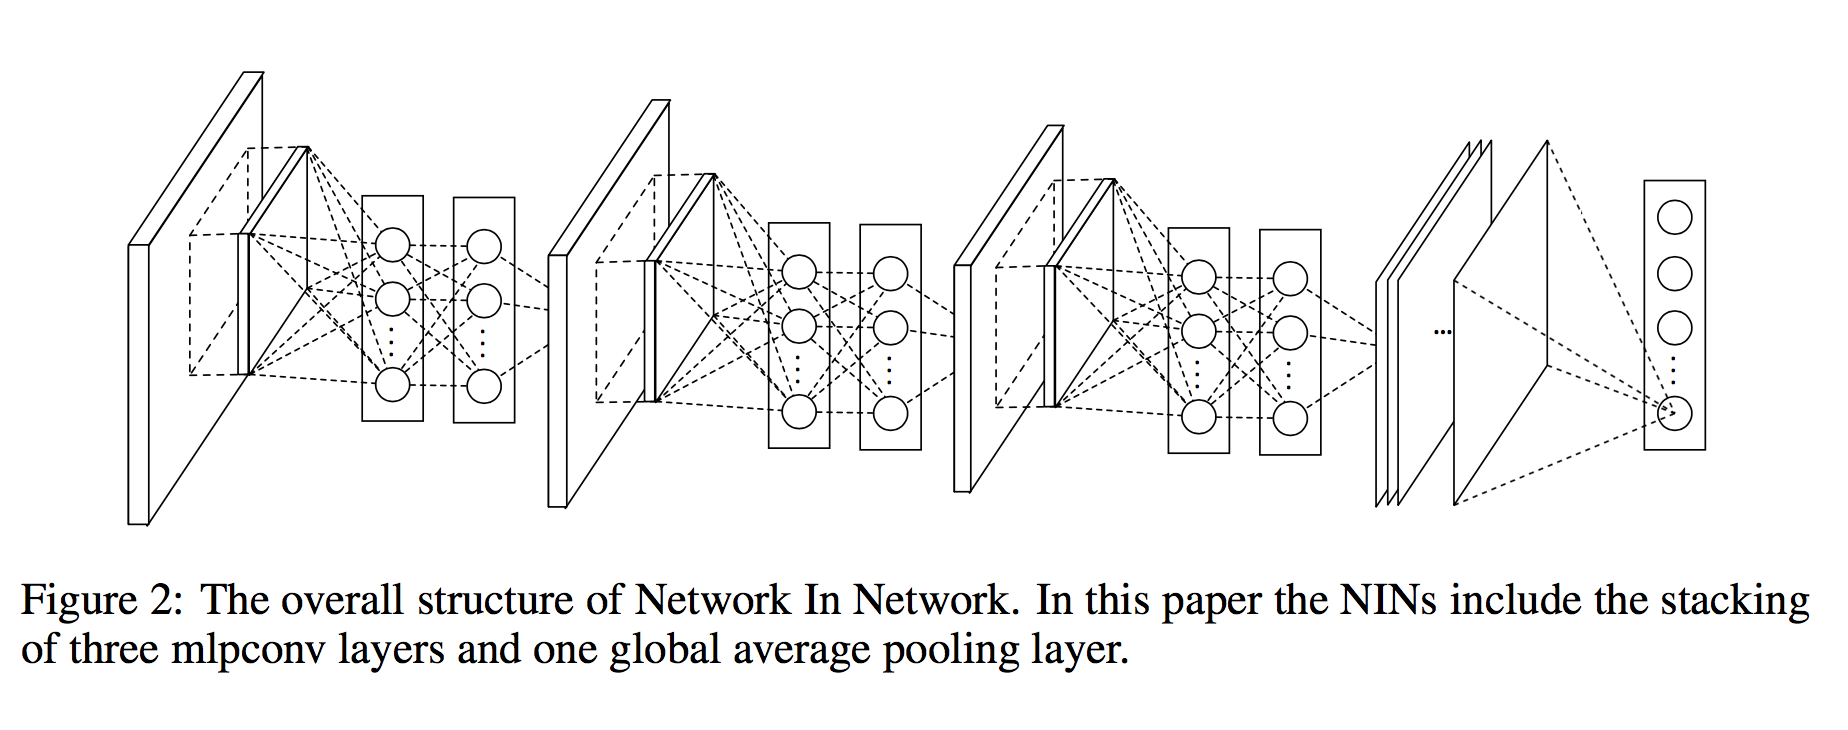

바로 위의 그림을 보면 알 수 있듯이, NIN 구조가 기존 CNN과 또 다른 점은 CNN 최종단에 있는 fully-connected layer가 없다. 그 대신 **Global average pooling**을 사용했고, 이는 앞에서 효과적으로 feature-vector를 추출했기 때문에, 추출된 vector들에 대한 pooling만으로도 충분다고 주장한다. 



**MLP를 사용했을 때 장점은**
- **convolution kernel보다 non-linear하기 때문에 feature를 더 잘 추출함**
- **1x1 conv를 사용했기 때문에 feature map을 줄일 수 있음**
- **average pooling만으로 classifier 역할을 할 수 있기 때문에, Overfitting 문제를 회피할 수 있고, 연산량이 대폭 줄어든다.**

## **GoogLeNet 구조**

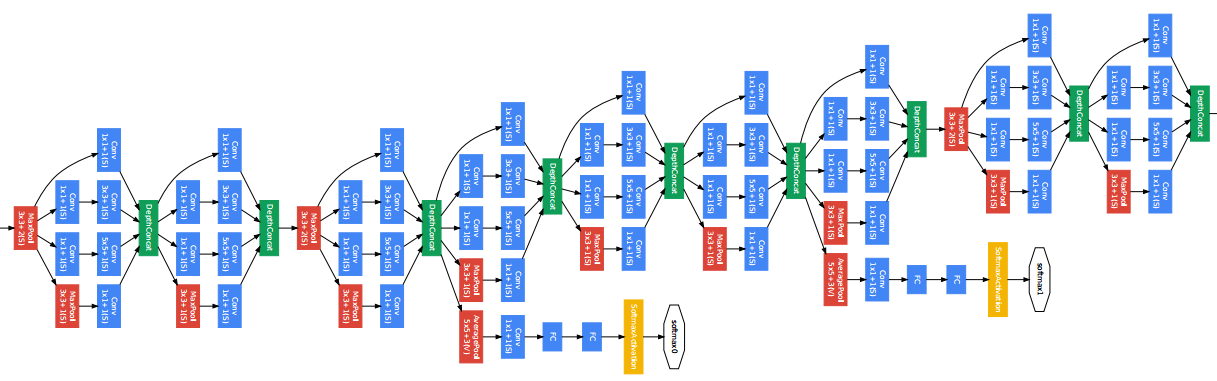

GogLeNet의 구조는 총 9개의 Inception 모듈이 적용 되었고, 위 그림에서
- 파란색: conv
- 빨간색: max-pooling
- 노란색: softmax
- 녹색: concat

을 의미 합니다.

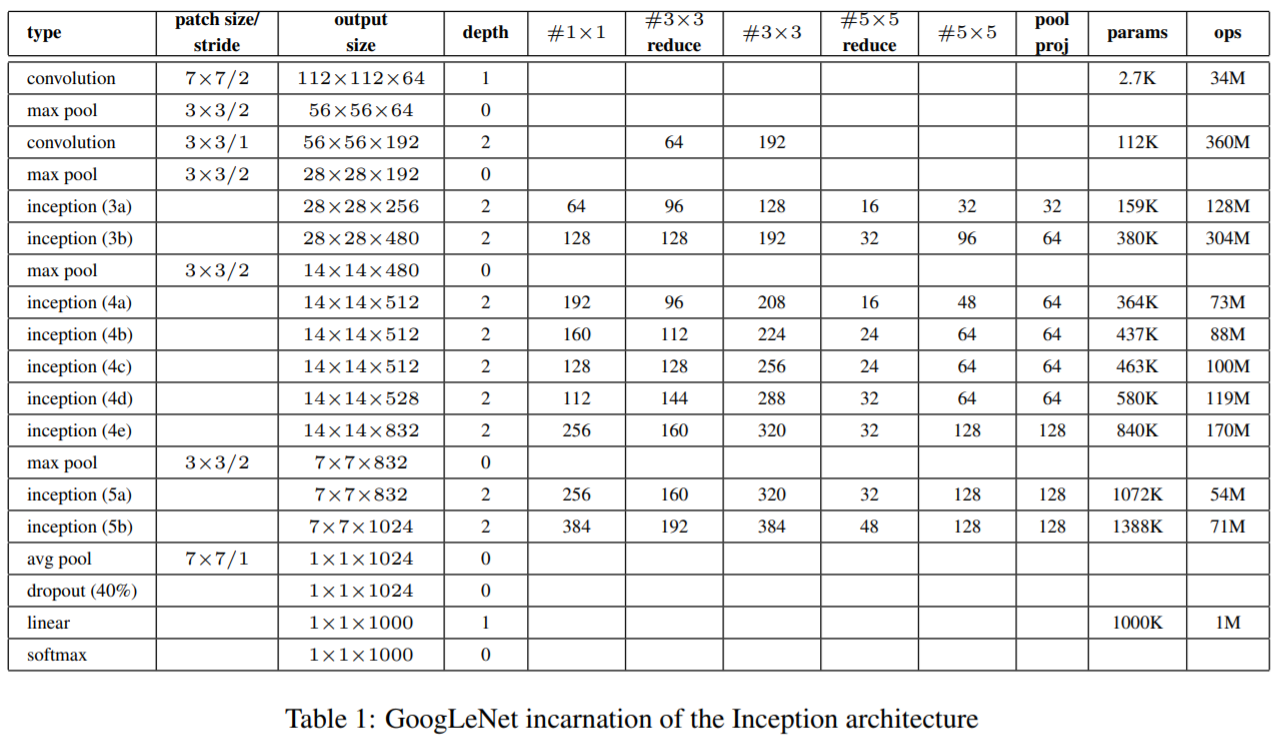

위 표는 GoogLeNet에서 각 Layer의 구조를 나타낸 것이다.
- pathch size/stride: 커널의 크기와 stride 간격
- output size: 얻어지는 feature map의 크기 및 개수
- depth: 연속적인 conv의 개수
- #1x1: 수행한 뒤 얻어지는 feature map의 개수
- #3x3 reduce: 3x3 conv 앞쪽에 있는 1x1 conv와 연속적으로 이어 얻어진 feature map의 개수
- #3x3: 3x3 conv를 적용해 얻은 feture map의 개수
- #5x5 reduce: #3x3 reduce와 동일
- #5x5: 3x3와 동일
- pool proj: max-pooling과 뒤에 오는 1x1 conv를 적용하여 얻어진 feature-map의 개수
- params: 해당 layer에 있는 free parameter의 개수
- ops: 연산의 수

### **1x1 filter**

위에 NIN에서도 1x1에 대해 잠깐 소개를 했는데, 정확히 왜 쓰는가에 대해 설명을 하겠다.

1x1 Convolution을 하는 이유는 **차원을 줄이는 것**으로, **Hebbian principle(Neurons that fire together, wire together)**에 의해 차원을 줄일 수 있다.

1x1 Convolution을 수행하면, 여러 개의 feature map으로부터 비슷한 성질을 갖는 것들을 묶어낼 수 있고, feature map의 숫자를 줄일 수 있으며, 연산량도 줄고, 연산량이 줄기 때문에 depth를 늘릴 수 있는 여지가 생긴다.

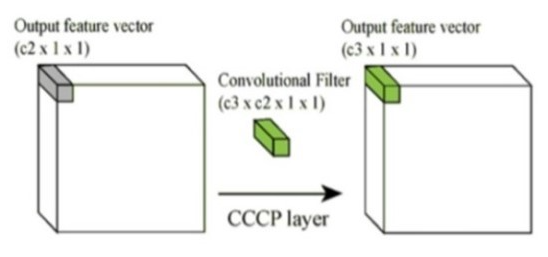

위 그림에서 만약 **c2 > c3**이면, 차원이 줄어드는 효과를 얻을 수 있다.

### **Inception**

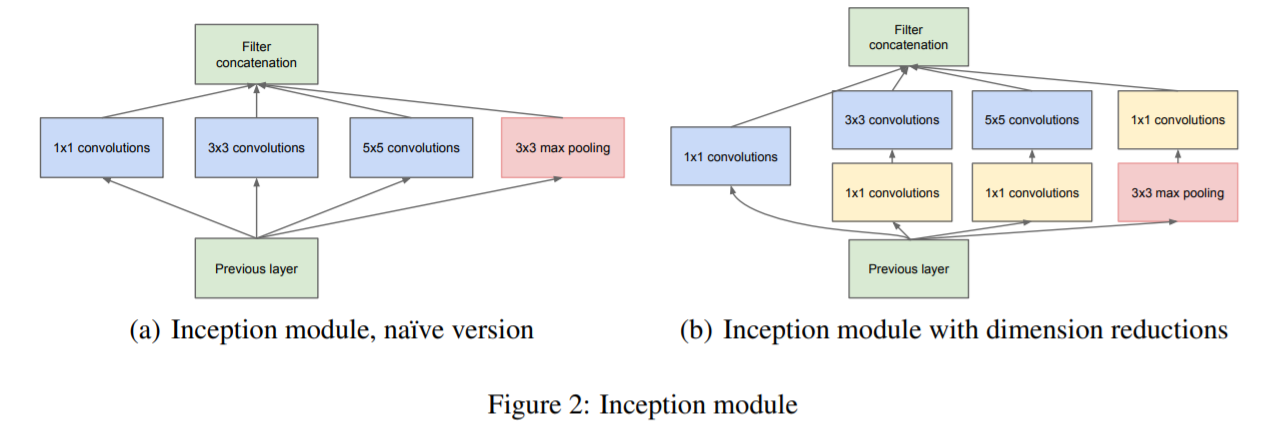

위에서 말했듯이, Inception은 NIN의 구조를 많이 참고하였다. Local receptive field에서 더 **다양한 feature를 추출하기 위해 여러개의 convolution을 병렬적으로 활용**하였다.

원래 1x1, 3x3, 5x5 conv 및 3x3 max pooling을 나란히 놓는 구조를 고안하여 다양한 scale의 feature를 추출하기에 적합한 구조가 되지만, **3x3, 5x5 conv는 연산량의 관점에서 보면, expensive unit**이 된다.

그래서 3x3, 5x5 conv 앞에 1x1 conv를 cascade 구조로 두고, 1x1 conv를 통해 feature map의 개수를 줄이게 되면, feature 추출을 위한 여러 scale을 확보하면서도 연산량의 균형을 맞출  수 있다.

NIN에서는 MLP를 이용하여 non-linear feature를 얻어 내는 것에 집중했지만, GoogLeNet은 CNN 구조에서 크게 벗어나지 않으면서도 효과적인 feature를 추출 할 수 있게 이용하였다.

### **Auxiliary classifier**

googLeNet의 블락도를 보면 이전의 CNN 구조에서는 볼 수 없는 구조인 **Auxiliary classifier**라고 불리는 독특한 unit이 있다.

**Auxiliary classifier**란, gradient 전달이 잘 되지 않는 하위 layer을 training하기 위해 사용한다. 쉽게 설명하자면, classification의 문제를 해결하는 Neural Network는 softmax를 맨 마지막 layer에 딱 하나만 놓지만, Auxiliary classifier는 **모델의 중간중간에 softmax를 두어 중간에서도 Backpropagation**을 하게 한다.


즉, 이를 통해 vanishing gradient가 잘 전달되지 않는 문제 해결하여 속도 문제와 Overfitting을 해결할 수 있다.

### **Factorizing Convolutions**

큰 필터 크기를 갖는 convolution kernel를 인수분해하면, 작은 kernel 여러개로 구성된 deep network를 만들 수 있으며, parameter의 수가 줄으들면서 망이 깊어지는 효과를 얻을 수 있다.

5x5 conv를 쓰는 것보다 3x3 conv를 두번 쓴 것은 feature map의 크기는 같지만, free parameter의 수는 약 28%가 절감이 된다.

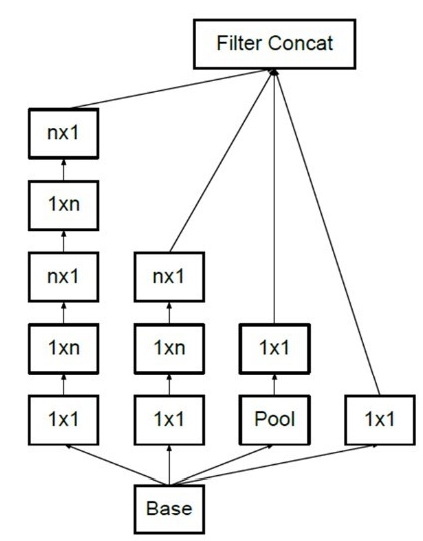

이와 같이 n x n conv는 1 x n 밑 n x 1로 분해가 가능하며 n이 클수록 파라미터 절감 효과는 커진다.

## **결론**

본 논문은 네트워크를 단순히 Convolution Layer를 쌓아서 깊게 만들면, 생기는 문제점들의 대체 방안을 제안했다.

Inception 모듈을 사용하여 다양한 feature를 추출할 수 있었고, Auxiliary classifier 덕분에 네트워크를 깊게 쌓아도 vanishing gradient 문제점(학습 속도가 아주 느려지거나, Overfitting이 발생)을 해결할 수 있었다.